t-SNE of Criticality Score Algorithm Data \\
Author: Blaise Swartwood

In [13]:
#importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [14]:
#accessing data file
df = pd.read_csv('C:\\Users\\swartwba\\OneDrive - Rose-Hulman Institute of Technology\\Desktop\\Freshman Year\\CSDataAsCSV.csv', usecols=[i for i in range(6, 18) if i != 16])
df.head()

,created_since,updated_since,contributor_count,org_count,commit_frequency,recent_release_count,updated_issues_count,closed_issues_count,issue_comment_frequency,github_mention_count,criticality_score
0,131,0,5000,10,1555.33,69,552,266,3.18,57193965,0.92520
1,209,0,2044,5,70.83,49,896,806,13.15,36120246,0.89559
2,162,0,3472,9,48.37,67,36122,34479,2.00,1168604,0.88907
3,97,0,4367,5,138.08,65,86352,84020,2.00,529999,0.88400
4,151,0,3579,13,104.13,69,27449,26723,2.00,88134,0.87876


In [15]:
#random sampling
df = df.sample(n = 10000)
df.index = range(len(df))
#separating features and criticality score
X = df.drop('criticality_score', axis=1)
y = df['criticality_score'].round(1)
#Rounding to visualize T-SNE

In [16]:
#performing t-SNE
model = TSNE(random_state=2)
transformed = model.fit_transform(X)

In [17]:
#new 2D data
df2 = pd.DataFrame(transformed)
df2.columns = ['x', 'y']
df2['criticality_score'] = y
df2.head()

,x,y,criticality_score
0,31.665627,-66.548592,0.2
1,-46.039600,35.797737,0.3
2,-13.410276,-31.247448,0.3
3,-9.427178,65.623512,0.2
4,51.299469,-4.674928,0.4


Text(0, 0.5, 'T-SNE y')

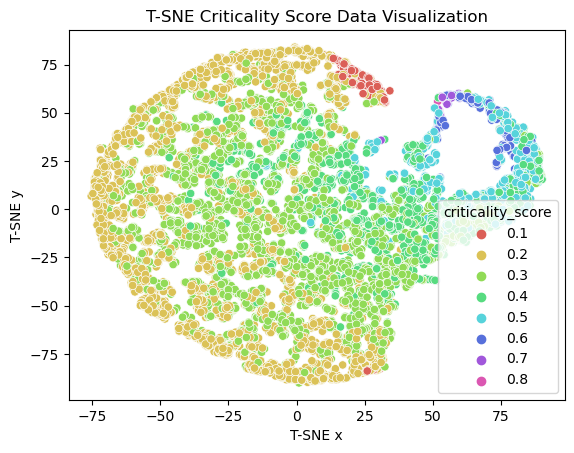

In [19]:
#plotting first 10,000 data points
plot = sns.scatterplot(x='x', y='y', data=df2, hue=y, palette=sns.color_palette("hls", 8))
plot.set_title("T-SNE Criticality Score Data Visualization")
plot.set_xlabel("T-SNE x")
plot.set_ylabel("T-SNE y")